# NeuroPredict
## EEG Seizure Classification

### Exploratory Data Analysis

In this notebook, we will explore the **Epileptic Seizure Recognition** dataset to understand the characteristics of EEG signals associated with different medical states. This analysis will serve as a foundation for feature engineering and model development in subsequent stages of the project.

## Dataset Description
- 5 subjects
- 4097 EEG data points per individual (23.5 seconds recording)
- Data reshaped into 23 segments per individual (each chunk: 178 data points)
- Labels:

 - A: Eyes open baseline (healthy patient)  
 - B: Eyes closed baseline (healthy patient) 
 - C: EEG from healthy area adjacent to tumors ('Healthy Silent Stage')    
 - D: EEG from tumor-affected areas ('Tumor Silent Stage') 
 - E: Recording of seizure activity 

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load the Dataset

In [3]:
# Load the dataset
data_path = 'Data/Epileptic Seizure Recognition.csv'
df = pd.read_csv(data_path)

In [4]:
# Display the first few rows
df.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


## Data Overview

In [5]:
# Check the shape of the dataset
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset contains 11500 rows and 180 columns.


In [6]:
# Check for missing values
df.isnull().sum()

Unnamed    0
X1         0
X2         0
X3         0
X4         0
          ..
X175       0
X176       0
X177       0
X178       0
y          0
Length: 180, dtype: int64

### Verifying Column Lengths

In [8]:
# Get the number of non-null entries per column
column_counts = df.notnull().sum()

# Display the counts
print("Number of non-null entries per column:")
print(column_counts)

Number of non-null entries per column:
Unnamed    11500
X1         11500
X2         11500
X3         11500
X4         11500
           ...  
X175       11500
X176       11500
X177       11500
X178       11500
y          11500
Length: 180, dtype: int64


### Checking for Consistency Across Columns

In [9]:
# Check if all columns have the same number of non-null entries
if column_counts.nunique() == 1:
    print("\nAll columns have the same number of non-null entries.")
else:
    print("\nColumns have different numbers of non-null entries.")
    print(column_counts[column_counts != num_rows])


All columns have the same number of non-null entries.


### Class Distribution

In [7]:
# Understand the distribution of classes
class_counts = df['y'].value_counts()
print(class_counts)

y
4    2300
1    2300
5    2300
2    2300
3    2300
Name: count, dtype: int64


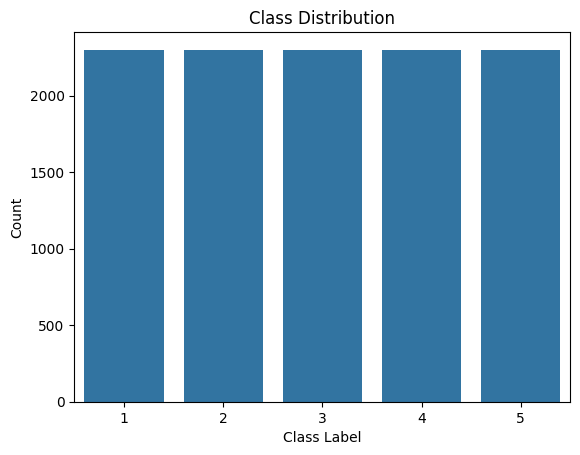

In [8]:
# Plot the class distribution
sns.countplot(x='y', data=df)
plt.title('Class Distribution')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.show()

### Data Description

In [9]:
# Get basic statistics
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,...,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,3.000000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,...,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,1.414275
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,...,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000,1.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.00000,-55.00000,-54.000000,...,-55.000000,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000,2.000000
50%,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,-7.00000,-7.000000,...,-9.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000,3.000000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.00000,36.00000,35.250000,...,34.000000,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000,4.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.00000,2047.00000,2047.000000,...,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000,5.000000


## Visualizing EEG Signals

Let's visualize some of the EEG signals from different classes to observe any noticeable patterns.

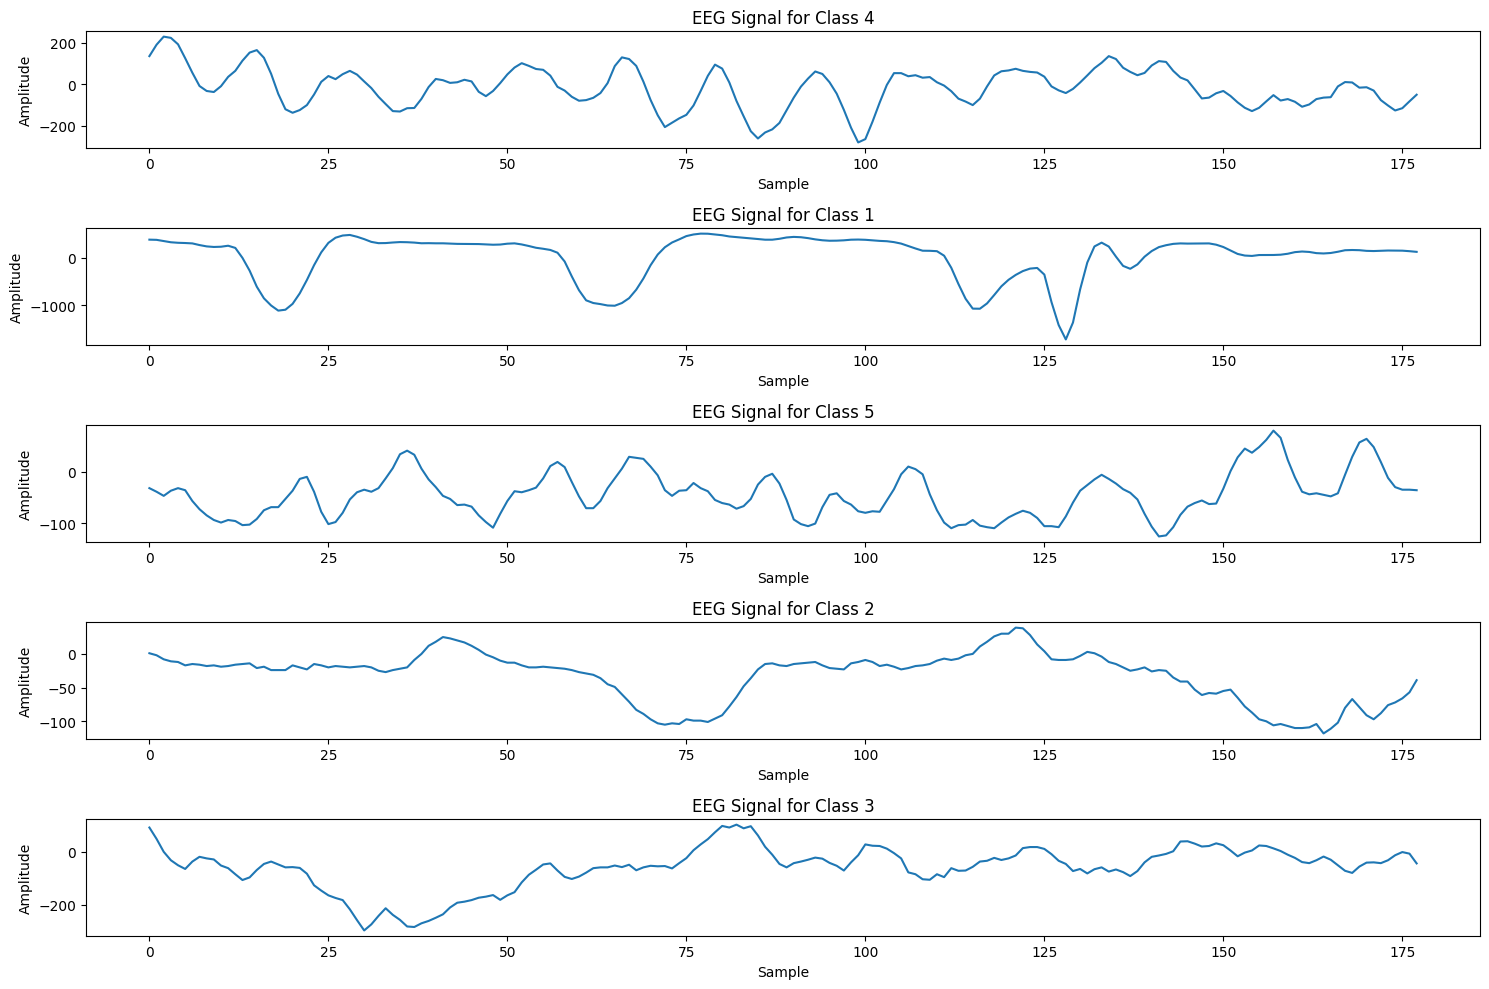

In [10]:
# Select a sample from each class
samples = {}
for label in df['y'].unique():
    samples[label] = df[df['y'] == label].iloc[0, 1:-1]

# Plot the EEG signals
fig, axs = plt.subplots(len(samples), 1, figsize=(15, 10))
for i, label in enumerate(samples):
    axs[i].plot(samples[label].values)
    axs[i].set_title(f'EEG Signal for Class {label}')
    axs[i].set_xlabel('Sample')
    axs[i].set_ylabel('Amplitude')
plt.tight_layout()
plt.show()

## Feature Correlation

Due to the high dimensionality of the data, computing correlations for all features may not be practical. Therefore, we can compute the correlation between a subset of features and the target variable.

In [11]:
# Select a subset of features
subset_features = df.columns[1:21]  # First 20 features

# Compute correlations
correlations = df[subset_features].corrwith(df['y'])
correlations = correlations.abs().sort_values(ascending=False)
print(correlations)

X11    0.038056
X12    0.035379
X10    0.034459
X9     0.029452
X8     0.027478
X7     0.026422
X13    0.025946
X1     0.022375
X2     0.019154
X6     0.018256
X14    0.018229
X3     0.013469
X15    0.013234
X20    0.011401
X16    0.011119
X17    0.010245
X19    0.010081
X18    0.009434
X5     0.006597
X4     0.004763
dtype: float64


### Heatmap of Feature Correlation

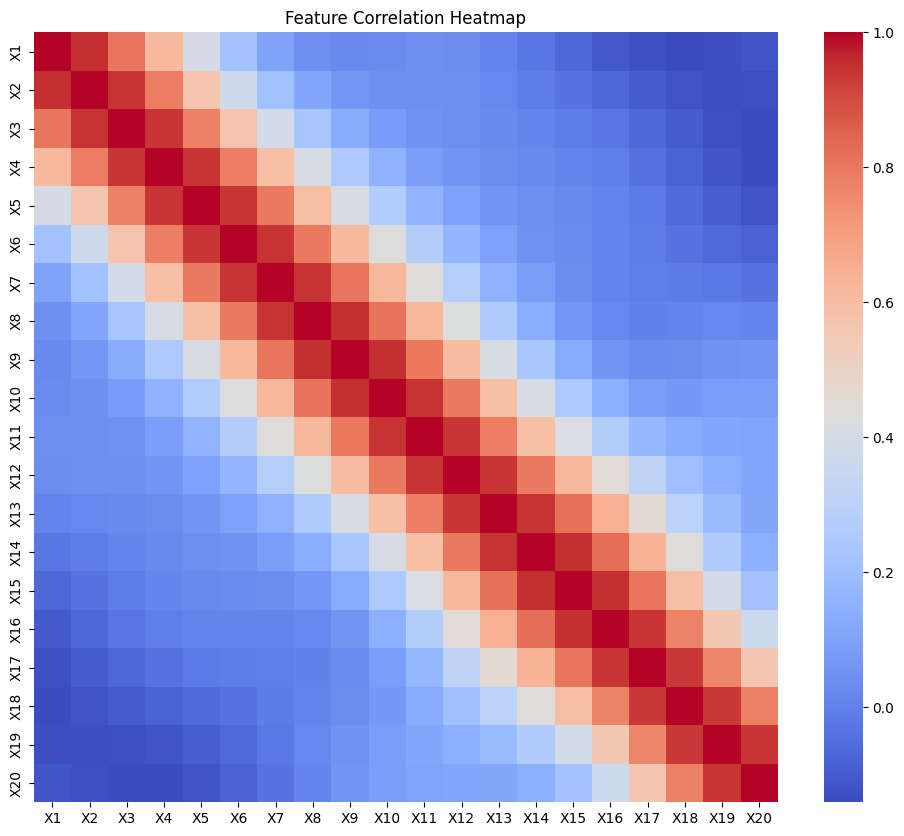

In [12]:
# Compute correlation matrix for the subset
corr_matrix = df[subset_features].corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

## Time Series Analysis

Performing time series analysis on EEG signals can help uncover temporal patterns.

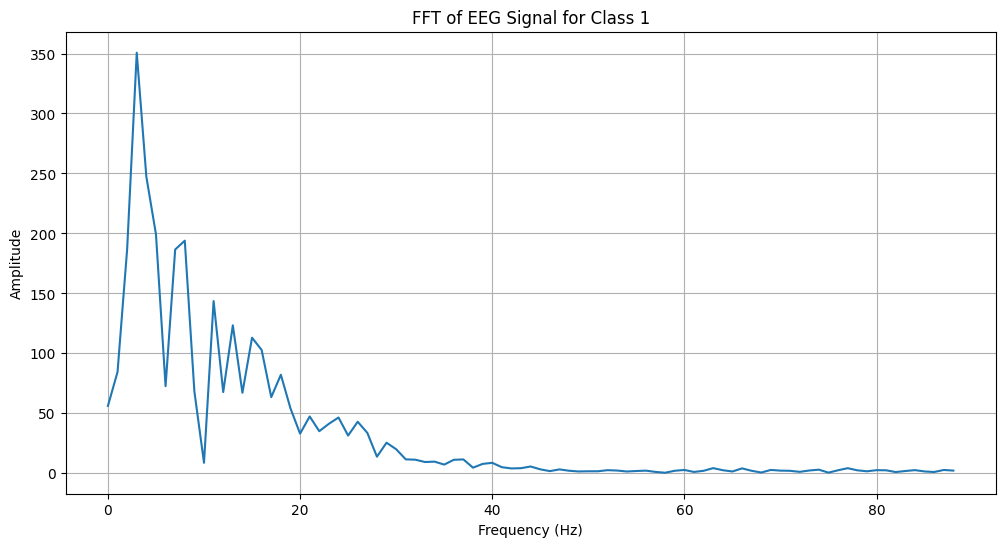

In [13]:
# Plot FFT of a sample signal
from scipy.fft import fft, fftfreq

# Sample signal from class 1
signal = df[df['y'] == 1].iloc[0, 1:-1].values

# Number of sample points
N = len(signal)
# Sample spacing
T = 1.0 / 178.0  # Assuming sampling rate is 178 Hz

yf = fft(signal)
xf = fftfreq(N, T)[:N//2]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.title('FFT of EEG Signal for Class 1')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

## Initial Observations

- The dataset is balanced across classes.
- EEG signals show distinct patterns for different classes.
- There is some correlation between features that can be exploited.
- Time series analysis like FFT can help in feature extraction.

## Next Steps

- Perform comprehensive feature engineering using time and frequency domain features.
- Explore dimensionality reduction techniques to address the high dimensionality.
- Prepare data for modeling by scaling and splitting into training and test sets.